# 자료와 CSV 파일

자료를 저장/공유하는 가장 일반적인 CSV(comma separated values) 파일이다.
앞에서 소개한 Kaggle, DrivenData와 같은 사이트에서 제공하는 자료도 대부분 CSV 파일이다.
일반적으로 자료는 2차원 표로 개념화할 수 있는데, CSV 파일은 표의 행(row)을 줄(line)로 대응시킨 텍스트 파일이다.
그리고 행의 여러 값은 동일한 줄에 기재하고 쉼표(빈칸 또는 탭)로 구분한다.

CSV 파일이 텍스트 파일이므로 메모장과 같은 편집기(editor)만 있으면 자료를 입력한 CSV 파일을 만들 수 있다.
가장 편리한 방법은 Excel과 같은 spreadsheet 프로그램을 사용하여 자료를 입력/수정한 다음 CSV 형식으로 저장하는 것이다.

## CSV 파일 읽기

CSV 파일에 저장된 자료를 읽어서 2차원 표를 개념화한 `DataFrame` 객체로 만드는 것이 파이썬을 이용한 자료분석과 통계분석의 시작이다.
자료를 `DataFrame` 객체로 만들면 기본적인 기술통계분석은 `DataFrame` 객체의 메소드로 수행할 수 있다.

CSV 파일을 읽고 `DataFrame` 객체를 만들 때는 `pandas`의 `read_csv()` 함수를 사용한다.
`read_csv()` 함수를 호출할 때도 `sep`, `header` 매개변수에 **쉼표가 아닌 값 구분문자**, **열 이름 여부**를 전달할 수 있다.

패키지를 사용하려면 먼저 패키지를 `import`해야 한다.
`pandas`는 다음과 같이 `import`하는 것이 관례이다.
`as` 다음에 기재한 것은 패키지에 대한 별명을 붙인다.
패키지에 별명을 붙이지 않아도 되지만 그러면 패키지 이름을 다 써서 프로그램해야 한다.

In [1]:
import pandas as pd

In [2]:
import pandas as pd
meta = pd.read_csv('metabolism.csv')
# metabolism_data_from_tsv_with_header = pd.read_csv('metabolism.csv', sep='\t', header=None)

## 객체의 속성과 메소드

객체는 자료와 함께 이 자료를 처리하는 기능도 가지고 있다.
따라서 `DataFrame` 객체는 자신이 저장하고 있는 자료와 자료에 대한 정보 그리고 자리를 처리(분석)하는 기본적인 기능을 가지고 있다.
이는 자료에 대한 정보를 추출해주거나 자료를 분석하는 함수를 별도로 만들거나 검색하지 않아도 된다는 것을 의미한다.
따라서 일단 자료가 `DataFrame` 객체로 만들어지면 후속 작업은 상당히 간편해진다.

객체가 할 수 있는 일(계산, 연산)은 객체에 부속된 함수로 구현되는데 이를 **메소드(method)**라고 한다.
객체가 보유하고 있는 정보는 객체에 부속된 변수에 저장되는데 이를 **속성(attribute)**이라고 한다.
따라서 객체로 하여금 어떤 일을 하게 하려면 객체의 메소들를 호출하면 되고, 객체의 정보를 보려면 객체의 속성을 조회하면 된다.

객체가 가지고 있는 속성과 메소드는 다음과 같이 알아볼 수 있다.

In [3]:
print(', '.join(dir(meta)))

T, _AXIS_ALIASES, _AXIS_IALIASES, _AXIS_LEN, _AXIS_NAMES, _AXIS_NUMBERS, _AXIS_ORDERS, _AXIS_REVERSED, _AXIS_SLICEMAP, __abs__, __add__, __and__, __array__, __array_wrap__, __bool__, __bytes__, __class__, __contains__, __copy__, __deepcopy__, __delattr__, __delitem__, __dict__, __dir__, __div__, __doc__, __eq__, __finalize__, __floordiv__, __format__, __ge__, __getattr__, __getattribute__, __getitem__, __getstate__, __gt__, __hash__, __iadd__, __iand__, __ifloordiv__, __imod__, __imul__, __init__, __init_subclass__, __invert__, __ior__, __ipow__, __isub__, __iter__, __itruediv__, __ixor__, __le__, __len__, __lt__, __mod__, __module__, __mul__, __ne__, __neg__, __new__, __nonzero__, __or__, __pow__, __radd__, __rand__, __rdiv__, __reduce__, __reduce_ex__, __repr__, __rfloordiv__, __rmod__, __rmul__, __ror__, __round__, __rpow__, __rsub__, __rtruediv__, __rxor__, __setattr__, __setitem__, __setstate__, __sizeof__, __str__, __sub__, __subclasshook__, __truediv__, __unicode__, __weakref__,

`DataFrame` 객체에 저장된 자료에 대한 전반적인 정보는 `info()` 메소드로 알아볼 수 있다.

In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
gender    19 non-null object
rate      19 non-null int64
weight    19 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes


## 열 이름의 조회와 수정

`DataFrame` 객체에 저장된 자료의 열 이름(변수 이름)을 보려면 `columns` 속성을 조회한다.
`columns` 속성의 값을 변경하면 열 이름을 변경할 수 있다.

자료구조에서는 열 이름이라고 하지만 통계학적으로는 변수, 머신 러닝이나 딥 러닝에서는 feature라고 한다.
따라서 이 용어들은 동의어로 사용할 수 있다.

In [5]:
print(meta.columns)

Index(['gender', 'rate', 'weight'], dtype='object')


In [6]:
old_names = meta.columns
meta.columns = ['var1', 'var2', 'var3']
print(meta.columns)
meta.columns = old_names
print(meta.columns)

Index(['var1', 'var2', 'var3'], dtype='object')
Index(['gender', 'rate', 'weight'], dtype='object')


## 열 이름으로 특정 열 추출

열 이름을 사용하면 자료에서 특정 열만 추출할 수 있다.
열 이름으로 특정 열을 추출할 때도 객체의 속성을 알아볼 때와 같이 `DataFrame` 객체 이름 다음에 마침표를 찍고 이어서 열 이름을 기재한다.

In [7]:
print(meta.gender)

0     M
1     M
2     F
3     F
4     F
5     F
6     M
7     F
8     F
9     M
10    F
11    F
12    M
13    F
14    F
15    F
16    F
17    M
18    M
Name: gender, dtype: object


## 행과 열의 수 조회

`DataFrame` 객체의 행과 열의 수를 알아보려면 `shape` 속성을 조회한다.
이 속성에는 행과 열의 수 두 값이 (행의 수, 열의 수)와 같이 `()`로 감싸져 저장되어 있는데, 이것은 `shape` 속성이 순서쌍에 해당하는 파이썬의 튜플(tuple) 자료형임을 나타낸다.
`[]` 연산자를 사용해서 튜플 객체에 저장된 값에 접근할 수 있다.

In [8]:
meta.shape

(19, 3)

In [9]:
nrow = meta.shape[0]
ncol = meta.shape[1]
print(nrow, ncol)

19 3


## 결측치가 아닌 값의 수 조회

각 열에서 결측치가 아닌 값의 수를 알고 싶으면 `DataFrame` 객체의 `count()` 메소드를 호출하면 된다.
파이썬에서 결측치는 `None`로 표시하는데 `count()` 메소드는 `None`이 아닌 값의 개수를 계산해준다.

In [10]:
meta.count()

gender    19
rate      19
weight    19
dtype: int64

In [11]:
meta.gender.count()

19

## 부분적인 자료 조회

`DataFrame` 객체에 저장된 자료의 규모가 크면 자료를 화면으로 보는 것도 상당히 시간이 걸린다.
따라서 `DataFrame` 객체에 저장된 자료의 일부분만 보는 방법이 필요하다.
`DataFrame` 객체의 `head()` 메소드와 `tail()` 메소드는 저장된 자료의 첫 몇 행과 마지막 몇 행만 출력해주는 메소드이다.
이 두 메소드를 호출할 때는 출력하고자 하는 행의 수를 인자로 줄 수 있다.

In [12]:
print(meta.head(3))

  gender  rate  weight
0      M  1792    62.0
1      M  1666    62.9
2      F   995    36.1


In [13]:
print(meta.tail(5))

   gender  rate  weight
14      F  1052    34.5
15      F  1347    51.1
16      F  1204    41.2
17      M  1867    51.9
18      M  1439    46.9


다음은 특정 열 첫 5개의 값를 출력하는 예이다.

In [14]:
meta.gender.head(5)

0    M
1    M
2    F
3    F
4    F
Name: gender, dtype: object

## 여러 열을 추출

`DataFrame` 객체에서 특정 열을 추출하는 또 다른 방법은 `[]` 연산자에 추출하고자 하는 열 이름을 문자열로 주는 것이다. 
여러 개의 열을 추출할 때는 이 방법을 사용해야 하며, 추출하고자 하는 열의 이름을 `[]`에 감싸서 `[]` 연산자에 인자로 전달해야 한다.
추출한 결과도 DataFrame 객체이며 다른 이름으로 저장할 수도 있다.

In [15]:
print(meta['weight'].head(5))
print(meta[['rate', 'gender']].head())

0    62.0
1    62.9
2    36.1
3    54.6
4    48.5
Name: weight, dtype: float64
   rate gender
0  1792      M
1  1666      M
2   995      F
3  1425      F
4  1396      F


In [16]:
meta_gender = meta[['rate', 'gender']]
print(meta_gender.info())
print(meta_gender.shape)
print(meta_gender.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
rate      19 non-null int64
gender    19 non-null object
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes
None
(19, 2)
Index(['rate', 'gender'], dtype='object')


## 자료의 조회와 수정

`DataFrame` 객체의 `values` 속성을 이용하면 자료 전체를 `numpy`에서 정의한 배열 자료형으로 접근할 수 있다.
즉 `[]` 연산자를 이중으로 사용하여 자료에 접근할 수 있다.
첫 번째 `[]` 연산자에는 행 번호를 두 번째 `[]` 연산자에는 열 번호를 주면 된다.

대부분의 머시 러닝, 딥 러닝 패키지들은 `numpy`를 기반으로 하고 있으므로 때로는 `DataFrame` 객체가 아닌 `numpy.ndarray` 객체로 자료를 주어야 한다.
이때 `values` 속성을 효율적으로 사용할 수 있다.

In [17]:
print(meta.values)
print(type(meta.values))
meta.values[0][2]

[['M' 1792 62.0]
 ['M' 1666 62.9]
 ['F' 995 36.1]
 ['F' 1425 54.6]
 ['F' 1396 48.5]
 ['F' 1418 42.0]
 ['M' 1362 47.4]
 ['F' 1502 50.6]
 ['F' 1256 42.0]
 ['M' 1614 48.7]
 ['F' 1189 40.3]
 ['F' 913 33.1]
 ['M' 1460 51.9]
 ['F' 1124 42.4]
 ['F' 1052 34.5]
 ['F' 1347 51.1]
 ['F' 1204 41.2]
 ['M' 1867 51.9]
 ['M' 1439 46.9]]
<class 'numpy.ndarray'>


62.0

`DataFrame` 객체의 `values`을 이용하는 것보다 `iloc[]` 메소드를 사용하는 것이 더 편리할 때가 있다.
`iloc()` 메소드를 호출할 때는 접근하고자 하는 행과 열의 번호를 인자로 준다.

`iloc[]` 메소드를 호출할 때 **슬라이싱(slicing)**이란 기법을 사용할 수 있다.
인덱스를 `start:stop` 또는 `start:stop:step`와 같은 형식으로 주는 것을 슬라이싱이라 한다.
예를 들어 `start:stop`은 `start`에서 시작해서 1씩 증가하지만 `stop`보다는 작은 일련의 인덱스를 나타내고, `start:stop:step`은 `start`에서 시작해서 `step`만큼씩 증가시키지만 `stop`을 초과하지 않는 일련의 인덱스를 나타낸다.
만약 `iloc[]` 메소드를 메소드를 호출할 때 `start`가 생략되면 `strat`는 0이 된다.
한편 `stop`이 생략되면 `stop`은 열의 수가 되며, `step`이 생략되면 `step`은 1이 된다.

In [18]:
print(meta.iloc[0,2])
print(meta.iloc[0:2, 2])
print(meta.iloc[0:3, 0:2])
print(meta.iloc[:2, 1:])
print(meta.iloc[::3, 2])

62.0
0    62.0
1    62.9
Name: weight, dtype: float64
  gender  rate
0      M  1792
1      M  1666
2      F   995
   rate  weight
0  1792    62.0
1  1666    62.9
0     62.0
3     54.6
6     47.4
9     48.7
12    51.9
15    51.1
18    46.9
Name: weight, dtype: float64


`DataFrame` 객체의 `iloc[]` 메소드를 사용하여 값을 수정할 수도 있다.

In [19]:
meta_cp = meta.copy() # 복사본을 만들 때 copy() 메소드를 사용한다.
print(meta_cp.iloc[2, 2])
meta_cp.iloc[2, 2] = 30.0
print(meta_cp.iloc[2, 2])
meta_cp.iloc[2, 2] = 36.1
print(meta_cp.iloc[2, 2])

36.1
30.0
36.1


`DataFrame` 객체에 저장된 자료에 접근하거나 수정하는 메소드로 `at[]`가 있다.
`iloc[]`와 다른 점은 `at[]`는 행 번호와 열 이름을 인자로 해서 호출한다는 것이다.

In [20]:
print(meta_cp.at[0, 'weight'])

62.0


In [21]:
meta_cp.at[0, 'weight'] = 45.4
print(meta_cp.at[0, 'weight'])

45.4


## 열의 추가와 삭제

통계분석을 실행하면서 기존 변수를 이용하여 새로운 변수를 만들어 내야 할 경우가 있다.
머신 러닝이나 딥 러닝에서는 이를 **feature engineering**이라고 한다.
새로 생성된 변수도 기존 자료에 추가해야 분석 작업을 손쉽게 할 수 있다.

난수를 발생하여 가상 자료를 만들어 실습하기로 하자.
난수를 발생하는 여러 가지 함수는 `numpy` 라이브러리의 `random` 모듈에 정의되어 있다.
그 중에서 `randn()` 함수는 표준정규분포의 난수를 발생하는 함수인데 원하는 난수의 개수를 인자로 호출하면 된다.

In [22]:
import numpy as np
np.random.randn(10)

array([-0.34680048, -1.36303419,  1.60694778,  0.15186643, -0.27594606,
        2.06955112, -0.25934758, -0.8487819 ,  2.09594129,  1.03291941])

`DataFrame` 객체에 열을 추가하거나 제거할 수 있다.
`DataFrame` 객체 `meta`에 추가할 새로운 열은 기존 열과 동일한 개수의 값을 가져야 한다.

In [23]:
new_var = np.random.randn(meta.shape[0])
print(new_var)

[-1.35555614 -0.14619455  1.07796611 -0.98861235 -0.19409952  1.60182818
  1.569996    0.78359772  0.73325957 -0.28831965 -0.87931328  0.45853895
  1.17980988  0.61219059 -1.04503673 -0.04059132  0.41916589 -0.89969527
 -1.09355698]


`DataFrame` 객체에 새로운 열을 추가하려면 `[]` 연산자에 추가할 열의 이름을 주고 새로운 자료를 대입하면 된다.

In [24]:
meta['new_var'] = new_var
print(meta.head())

  gender  rate  weight   new_var
0      M  1792    62.0 -1.355556
1      M  1666    62.9 -0.146195
2      F   995    36.1  1.077966
3      F  1425    54.6 -0.988612
4      F  1396    48.5 -0.194100


`DataFrame` 객체에서 특정 열을 삭제할 때는 다음과 같이 `del` 문장을 사용한다.

In [25]:
del meta['new_var']
print(meta.head())

  gender  rate  weight
0      M  1792    62.0
1      M  1666    62.9
2      F   995    36.1
3      F  1425    54.6
4      F  1396    48.5


## 척도의 지정

컴퓨터로 자료를 처리할 때 입력한 자료로 어떤 계산 또는 연산을 할 수 있는가를 지정하는 것은 오류를 방지하는 좋은 방법이다.
변수의 **척도(scale)**는 그 변수를 측정한 값으로 어떤 계산이나 연산을 할 수 있는지 나타낸다.
파이썬을 비롯한 프로그래밍 언어에서는 통계학에서 분류하는 4가지 척도를 모두 나타내지는 못하고 3가지로 나타내는데 **명목척도**와 **순서척도** 그리고 **비척도**가 그것이다.
**구간척도**는 지정하는 방법이 없으므로 프로그램을 작성하거나 분석하는 사람은 구간척도에 대해서는 특히 조심해야 한다.

대부분의 프로그래밍 언어는 숫자를 기본적으로 비척도 간주하므로 변수 별로 **범주형 변수(categorical variable, 명목척도나 순서척도를 갖는 변수)** 여부를 지정해야 한다.
이를 위해 `DataFrame` 객체는 `astype()` 메소드가 준비되어 있다.
`astype()` 메소드를 호출할 때는 `CategoricalDtype` 객체를 전달해야 한다.
`CategoricalDtype` 객체를 생성할 때 `categories` 매개변수에 범주형 변수가 가질 수 있는 값의 목록을 주고 `ordered` 매개변수에는 순서척도 여부를 `True` 또는 `False`로 지정해야 한다.
`ordered` 매개변수에 `True`를 전달하면 순서척도임을 지정하는 것이며 값의 순서는 `categories` 매개변수에 전달한 값의 순서와 같다.

한 가지 주의할 점은 `astype() 메소드`는 원본 자료를 척도를 변경하지 않고 척도가 변경된 새로운 열을 만들어 주므로 그 결과를 저장해야 한다.

**대사율자료**에서 변수 `gender`의 척도는 명목척도이다.
따라서 **대사율자료** 의 `gender` 열의 척도는 다음과 지정하여야 한다.

In [26]:
genderType = pd.api.types.CategoricalDtype(categories=['M', 'F'], ordered=False)
meta.gender = meta.gender.astype(genderType)
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
gender    19 non-null category
rate      19 non-null int64
weight    19 non-null float64
dtypes: category(1), float64(1), int64(1)
memory usage: 499.0 bytes


## `DataFrame` 객체의 저장

`DataFrame` 객체에 저장된 자료는 여러 가지 방법으로 저장할 수 있지만 여기서는 CSV 파일로 저장하는 방법만 다루기로 하자.
파일 이름을 인자로 해서 `DataFrame` 객체의 `to_csv()` 메소드를 호출하면 CSV 파일로 저장할 수 있다.
`to_csv()` 메소드는 기본적으로 행 번호와 열 이름도 파일에 저장해준다.
행 번호는 출력하지 않는 것이 좋으며 이때는 `to_csv()` 메소드 `index` 매개변수에 `False`를 인자로 전달하면 된다.

In [27]:
meta.to_csv('metabolism_post.csv', index=False)

`to_csv()` 메소드를 호출할 때 쉼표 대신 사용할 값 구분문자, 열 이름의 출력 여부 등도 지정할 수 있다.
값 구분문자는 `sep` 매개변수에 전달하고, 열 이름의 출력 여부는 `header` 매개변수에 논리값으로 전달한다.
`DataFrame` 객체의 일부 열만 출력하도록 지정할 수도 있는데 `columns` 매개변수에 출력할 열 이름을 리스트로 전달하면 된다.

In [28]:
meta.to_csv('gender_rate.csv', columns=['gender', 'rate'], sep='\t', header=False, index=False)

## 통계분석

`DataFrame` 객체가 가지고 있는 기본적인 자료분석을 위한 메소드에 대해 알아보자.

In [29]:
print(meta.rate.max())
print(meta.rate.min())
print(meta.rate.mean())
print(meta.rate.median())
print(meta.rate.kurt())
print(meta.rate.skew())
print(meta.rate.var())
print(meta.rate.std())
print(meta.rate.mad())
qct = [0.1, 0.2, 0.3, 0.4, 0.5]
print(meta.rate.quantile(qct))

1867
913
1369.5263157894738
1396.0
-0.330662640995
0.132742542277
66308.37426900584
257.50412476114985
198.2880886426593
0.1    1040.6
0.2    1163.0
0.3    1224.8
0.4    1350.0
0.5    1396.0
Name: rate, dtype: float64


In [30]:
print(meta.rate.sum())
print(meta.rate.cumsum())
rate = meta.rate.sort_values()
print(rate)

26021
0      1792
1      3458
2      4453
3      5878
4      7274
5      8692
6     10054
7     11556
8     12812
9     14426
10    15615
11    16528
12    17988
13    19112
14    20164
15    21511
16    22715
17    24582
18    26021
Name: rate, dtype: int64
11     913
2      995
14    1052
13    1124
10    1189
16    1204
8     1256
15    1347
6     1362
4     1396
5     1418
3     1425
18    1439
12    1460
7     1502
9     1614
1     1666
0     1792
17    1867
Name: rate, dtype: int64


In [31]:
meta.corr()

,rate,weight
rate,1.000000,0.864736
weight,0.864736,1.000000


## 히스토그램 작성

`DataFrame` 객체의 `plot()` 메소드로 산점도, 히스토그램, 상자 그림, 꺽은 선 그래프, 원 그래프 등을 작성할 수 있다.
작성한 그래프를 jupyter notebook에 포함시키려면 다음 문장을 실행해야 한다.

In [32]:
%matplotlib inline

In [33]:
print(meta.rate.min())
meta.rate.max()

913


1867

Text(0,0.5,'density')

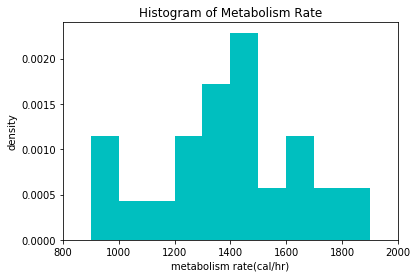

In [34]:
ax = meta.rate.plot(kind='hist', bins=[900, 1000, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 
               normed=True, 
               xlim=(800, 2000),
               color='c',
               title='Histogram of Metabolism Rate')
ax.set_xlabel('metabolism rate(cal/hr)')
ax.set_ylabel('density')

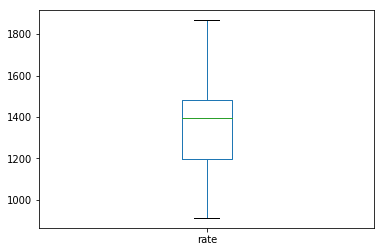

In [35]:
meta.rate.plot(kind='box')

F    0.631579
M    0.368421
Name: gender, dtype: float64


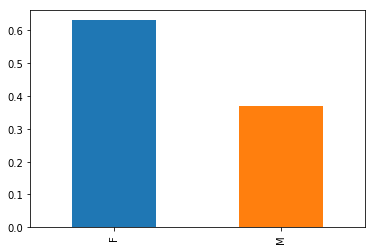

In [36]:
freq = meta.gender.value_counts()
relfreq = meta.gender.value_counts(normalize=True)
print(relfreq)
relfreq.plot(kind='bar')

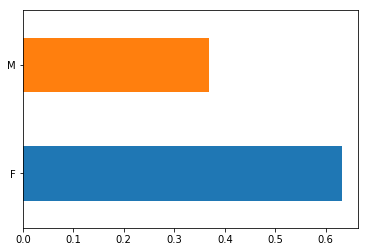

In [37]:
relfreq.plot(kind='barh')

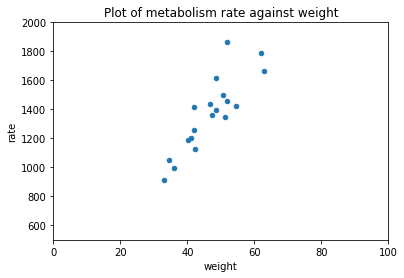

In [38]:
meta.plot(kind='scatter', x='weight', y='rate',
         xlim=(0, 100), ylim=(500, 2000),
         title="Plot of metabolism rate against weight")

## 집단별 분석

범주형 변수의 값이 같은 자료끼리 집단으로 나누어 분석하려면 `groupby()` 메소드를 사용한다.

In [39]:
meta.groupby('gender').mean()
meta.groupby('gender').std()

,rate,weight
gender,,
M,189.239707,6.688547
F,188.282891,6.868417


In [40]:
meta.groupby('gender').rate.mean()

gender
M    1600.000000
F    1235.083333
Name: rate, dtype: float64

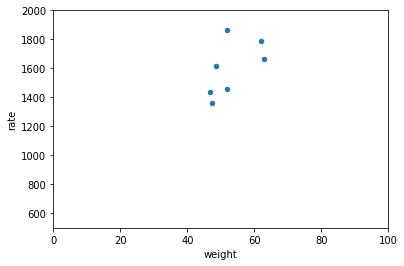

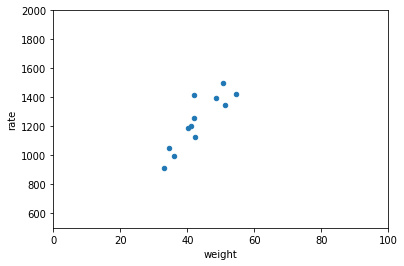

In [41]:
import matplotlib.pyplot as plt
#ax = plt.subplot()
subplots = meta.groupby('gender').plot(kind='scatter', x='weight', y='rate',
                            xlim=(0, 100), ylim=(500, 2000))

In [42]:
print(subplots)

gender
M    AxesSubplot(0.125,0.125;0.775x0.755)
F    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object


## 회귀분석

**회귀분석(regression analysis)**은 반응변수와 설명변수 간의 함수 관계를 찾아내고 추정하는 통계적 방법이다.
관계를 표현하는 함수는 선형일수도 비선형일 수도 있다.
전통적인 회귀분석 이론은 선형인 경우를 많이 다루지만 그렇다고 선형모형에만 적용할 수 있는 이론은 아니다.

전통적인 회귀모형의 반응변수는 양적변수이지만, 반응변수가 범주형 변수인 경우도 회귀분석 이론에 통합되었으며 **일반화 선형모형(generalized linear model)**이라고 한다.
대표적인 일반화 선형모형이 **로지스틱 회귀분석(logistic regression analysis)**이다.

머신 러닝이나 딥 러닝에서는 반응변수가 양적변수인 경우를 **회귀** 또는 **예측(prediction)**이라고 하고, 범주형 변수인 경우를 **분류(classification)**라고 한다.
이는 회귀분석 특히 비선형 회귀분석이 머신 러닝과 딥 러닝의 핵심임을 시사한다.

회귀분석과 같은 고급 통계분석 기법은 대부분 `statsmodels` 패키지에 구현되어 있다.
`statsmodels.formula.api` 모듈은 R과 동일한 방법으로 분석할 수 있도록 해준다.

회귀모형과 자료가 저장된 `DataFrame` 객체를 인자로 `ols()` 함수를 실행하여 회귀모형 객체를 만든다.
이 회귀모형 객체의 `fit()` 메소드를 실행하여 회귀분석을 실시하고 그 결과를 저장한다.
결과 객체의 `summary()` 메소드로 분석 결과 요약을 볼 수 있다.

회귀모형은 `반응변수 ~ 설명변수 + 설명변수 + ...`와 같은 방법으로 문자열로 지정한다.
반응변수와 설명변수는 `DataFrame` 객체에 저장된 자료의 열 이름이다.

In [43]:
from statsmodels.formula.api import ols
model = ols(formula='rate ~ weight', data=meta)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     50.40
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           1.78e-06
Time:                        19:17:46   Log-Likelihood:                -118.83
No. Observations:                  19   AIC:                             241.7
Df Residuals:                      17   BIC:                             243.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.1654    179.587      0.630      0.5

C:\app\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


회귀분석 결과 객체의 속성과 메소드는 다음과 같이 알아 볼 수 있다.

In [44]:
print(', '.join(dir(result)))

HC0_se, HC1_se, HC2_se, HC3_se, _HCCM, __class__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, _cache, _data_attr, _get_robustcov_results, _is_nested, _wexog_singular_values, aic, bic, bse, centered_tss, compare_f_test, compare_lm_test, compare_lr_test, condition_number, conf_int, conf_int_el, cov_HC0, cov_HC1, cov_HC2, cov_HC3, cov_kwds, cov_params, cov_type, df_model, df_resid, diagn, eigenvals, el_test, ess, f_pvalue, f_test, fittedvalues, fvalue, get_influence, get_prediction, get_robustcov_results, initialize, k_constant, llf, load, model, mse_model, mse_resid, mse_total, nobs, normalized_cov_params, outlier_test, params, predict, pvalues, remove_data, resid, resid_pearson, rsquared, rsquared_adj, save, scale, ssr, summary, summary2, t_test, tvalues

In [45]:
print(result.params)
print(result.params[0])

Intercept    113.165407
weight        26.878569
dtype: float64
113.16540715


분산분석표에 들어갈 자유도는 `df_resid`, `df_model` 속성에 저장되어 있다.

In [46]:
print(result.df_resid)
print(result.df_model)

17.0
1.0


오차항의 추정치 MSE는 `mse_model` 속성에 저장되어 있다.

In [47]:
print(result.mse_model)

892499.634981


잔차는 `resid` 속성에 저장되어 있다.

In [48]:
print(result.resid)

0      12.363305
1    -137.827407
2     -88.481754
3    -155.735283
4     -20.776011
5     175.934688
6     -25.209585
7      28.778994
8      13.934688
9     191.848275
10     -7.371744
11    -89.846046
12    -48.163146
13   -128.816739
14     11.523957
15   -139.660291
16    -16.562456
17    358.836854
18     65.229700
dtype: float64


회귀분석 결과에 대한 분산분석표는 다음과 같이 출력할 수 있다.

In [49]:
import statsmodels.stats.anova as smsa
anova = smsa.anova_lm(result, typ=1)
print(anova)

            df         sum_sq        mean_sq        F    PR(>F)
weight     1.0  892499.634981  892499.634981  50.3984  0.000002
Residual  17.0  301051.101862   17708.888345      NaN       NaN


C:\app\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\app\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\app\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


분산분석 결과가 `DataFrame` 객체이므로 자료가 저장된 `DataFrame` 객체를 다룰 때와 같은 방법으로 이용할 수 있다. 

In [50]:
print(type(anova))
print(anova.sum_sq)

<class 'pandas.core.frame.DataFrame'>
weight      892499.634981
Residual    301051.101862
Name: sum_sq, dtype: float64


원자료에 잔차와 추정값을 추가한 `DataFrame` 객체를 만들어서 CSV 파일로 저장할 수 있으며, 추정된 회귀선과 산점도를 겹친 그래프를 그릴 수 있다.

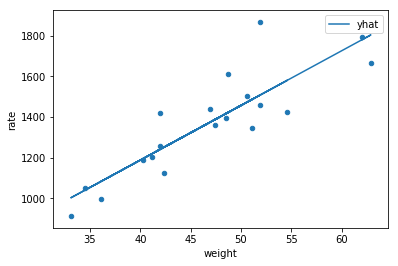

In [51]:
meta['residual'] = result.resid
meta['yhat'] = meta.rate - result.resid
ax = meta.plot(kind='line', x='weight', y='yhat')
meta.plot(kind='scatter', x='weight', y='rate', ax = ax)

In [52]:
meta.to_csv('meta_reg_result.csv', index=False)

## 범주형 설명변수가 있는 회귀모형의 분석

범주형 설명변수는 `C(범주형변수)`와 같은 방법으로 회귀모형에 포함시킨다.
그러면 범주형 변수는 0, 1을 값으로 갖는 **이진변수(binary variable, indicator variable)**로 자동변환되어 회귀분석이 실시된다.
머신 러닝이나 딥 러닝에서는 이런 변환을 **one hot encoding**이라고 한다.

회귀모형에 설명변수들의 효과만 포함시키고자 하면 설명변수 사이에 `+`를 기재하고, 설명변수 간의 **교호작용(상호작용, interaction)**도 포함시키고자 하면 변수 사이에 `*`를 기재한다.

In [53]:
model = ols(formula='rate ~ weight * C(gender)', data=meta)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     20.95
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           1.28e-05
Time:                        19:17:47   Log-Likelihood:                -116.27
No. Observations:                  19   AIC:                             240.5
Df Residuals:                      15   BIC:                             244.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               710.50

C:\app\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [54]:
model = ols(formula='rate ~ weight + C(gender)', data=meta)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     31.90
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           2.61e-06
Time:                        19:17:47   Log-Likelihood:                -116.65
No. Observations:                  19   AIC:                             239.3
Df Residuals:                      16   BIC:                             242.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        455.9077    236.010      1.

C:\app\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


## 연습문제

wine.csv에 저장된 **심장병자료**를 읽어들여 `DataFrame` 객체 wine를 만들고 다음 질문에 답하시오.

1. 열 이름을 알아보시오.
2. 자료의 수는 얼마인가?
3. 결측치가 있는지 알아보시오.
4. 포도주 소비량과 심장병으로 인한 사망률의 평균과 표준편차를 계산하시오.
4. 포도주 소비량과 심장병으로 인한 사망률 사이의 상관계수를 계산하시오.
5. 포도주 소비량과 심장병으로 인한 사망률 사이의 관계를 보기 위한 산점도를 작성하시오.
6. 포도주 소비량과 심장병으로 인한 사망률 사이의 관계에 대한 회귀모형을 세우고 분석하시오. 